<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/perceptron_iris_scilkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# implement a perceptron to classifiy iris using Scikit-Learn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

In [60]:
iris = datasets.load_iris()
x = iris.data[0:100,[2,3]]     # petal length and petal width
y = iris.target[0:100]

print(x[0:5,:])
print('Class labels:', np.unique(y))
labels = ['setosa', 'versicolor', 'virginica']

# standarization 
sc = StandardScaler()
sc.fit(x)   # to estimate mean and standard deviation
xstd = sc.transform(x) 
print(xstd[0:5,:])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
Class labels: [0 1]
[[-1.01297765 -1.04211089]
 [-1.01297765 -1.04211089]
 [-1.08231219 -1.04211089]
 [-0.94364311 -1.04211089]
 [-1.01297765 -1.04211089]]


In [64]:
# import a model
#!pip install ....
model = Perceptron(max_iter=100, eta0=0.01, random_state=1)
model.fit(xstd, y)
y_pred=model.predict(xstd)

print(model.coef_, model.intercept_)

error=np.mean((y-y_pred)**2)
print(error)

[[0.01664029 0.00711338]] [0.]
0.0


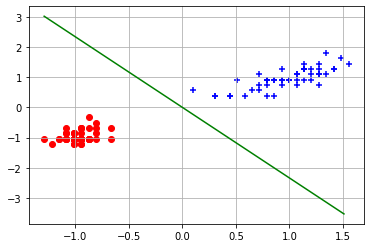

In [63]:
#plot decision line
plt.scatter(xstd[y==0,0],xstd[y==0,1], color='red', marker='o',label=labels[0])
plt.scatter(xstd[y==1,0],xstd[y==1,1], color='blue', marker='+',label=labels[1])

xx = np.arange(xstd[:,0].min(),xstd[:,0].max(),0.1)
yy = -model.coef_[0,0]/model.coef_[0,1] * xx - model.intercept_/model.coef_[0,1]
plt.plot(xx,yy,'g-')
plt.grid()
plt.show()